# Entrega 1 – Análise e Predição de Rendimento Agrícola

Nesta entrega, o objetivo foi analisar uma base de dados de rendimento de plantações, identificar padrões e outliers por meio de clusterização, e construir cinco modelos preditivos distintos para estimar o rendimento da safra, conforme o enunciado proposto.

---

In [23]:
import numpy as np
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from pycaret.regression import *

# 1. Análise Exploratória dos Dados

A análise exploratória foi realizada para compreender a estrutura e as características dos dados. Foram utilizadas amostragens, visualização das colunas, inspeção do shape do DataFrame, além de gráficos de dispersão (pairplot) e boxplots para identificar padrões, relações entre variáveis e possíveis valores discrepantes (outliers).

---

In [24]:
df = pd.read_csv("crop_yield.csv")
df.sample(10)

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
13,"Cocoa, beans",2504.70,18.19,85.45,26.02,6530
91,"Rice, paddy",2504.70,18.19,85.45,26.02,30614
54,Oil palm fruit,2414.79,18.18,85.76,25.93,163541
147,"Rubber, natural",2938.29,18.22,85.42,26.06,9701
18,"Cocoa, beans",2792.95,18.24,86.04,25.95,8300
150,"Rubber, natural",2604.59,18.19,83.44,26.43,6275
48,Oil palm fruit,1934.62,17.94,83.43,26.21,177543
17,"Cocoa, beans",2362.80,18.70,84.03,26.79,7663
27,"Cocoa, beans",3085.79,18.34,86.10,26.03,13056
34,"Cocoa, beans",2308.51,18.27,83.65,26.47,11108


In [25]:
df.columns

Index(['Crop', 'Precipitation (mm day-1)',
       'Specific Humidity at 2 Meters (g/kg)',
       'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)',
       'Yield'],
      dtype='object')

In [26]:
df.shape

(156, 6)

In [27]:
df_classes = df.drop(["Yield"], axis=1)

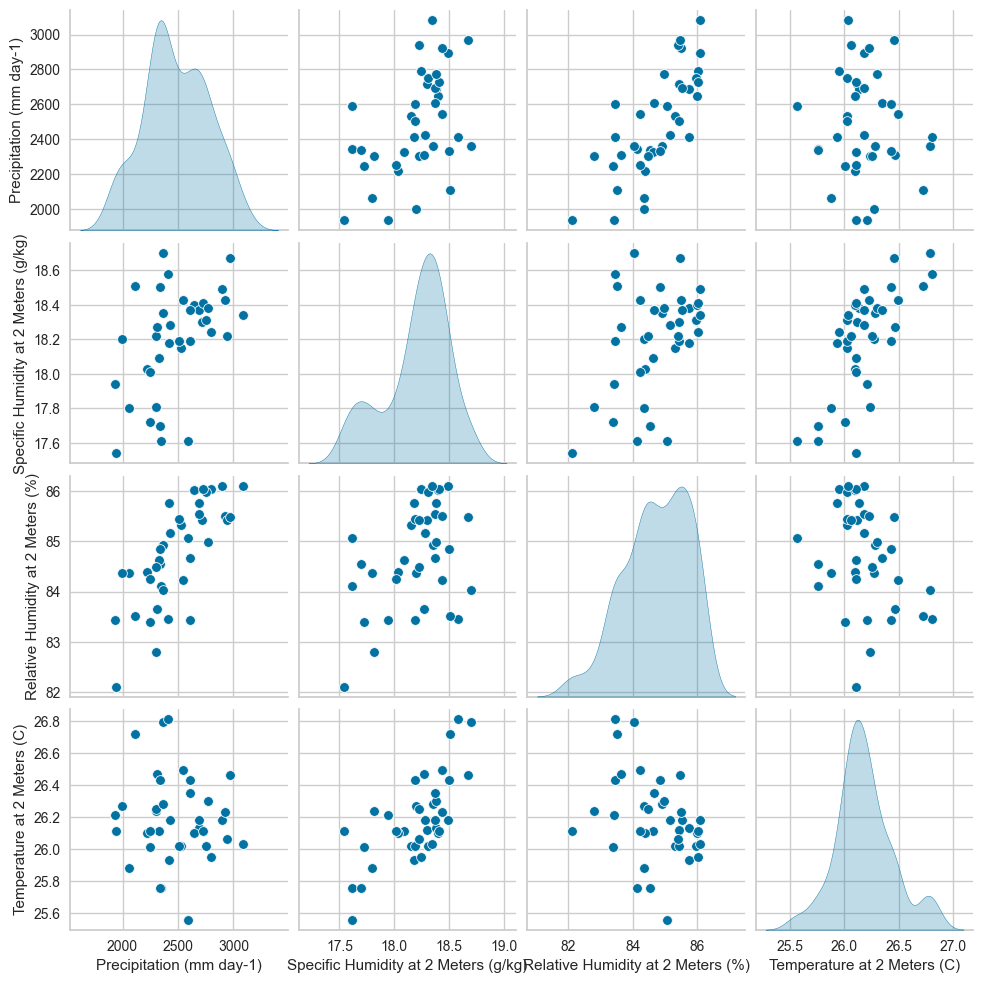

In [28]:
sns.pairplot(df_classes, diag_kind="kde")

<Axes: >

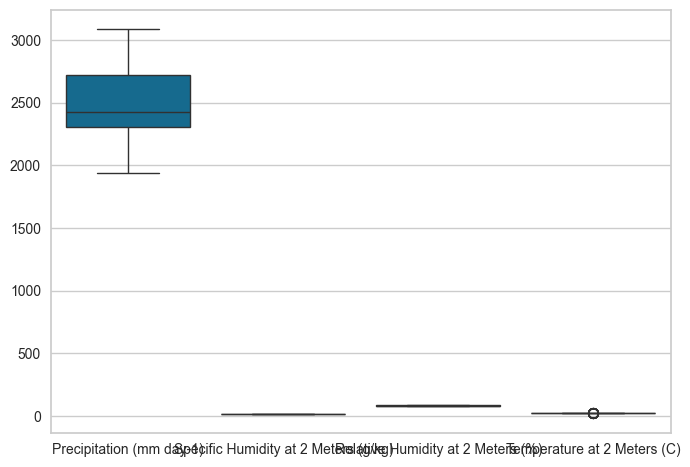

In [29]:
#BoxPlot
sns.boxplot(data=df_classes)

# 2. Clusterização e Identificação de Outliers

Para encontrar tendências nos rendimentos e identificar cenários discrepantes, foi aplicada a técnica de clusterização HDBSCAN sobre as variáveis numéricas. Os clusters foram visualizados em gráficos, permitindo observar agrupamentos naturais e possíveis outliers, atendendo ao requisito de análise de cenários discrepantes.

---

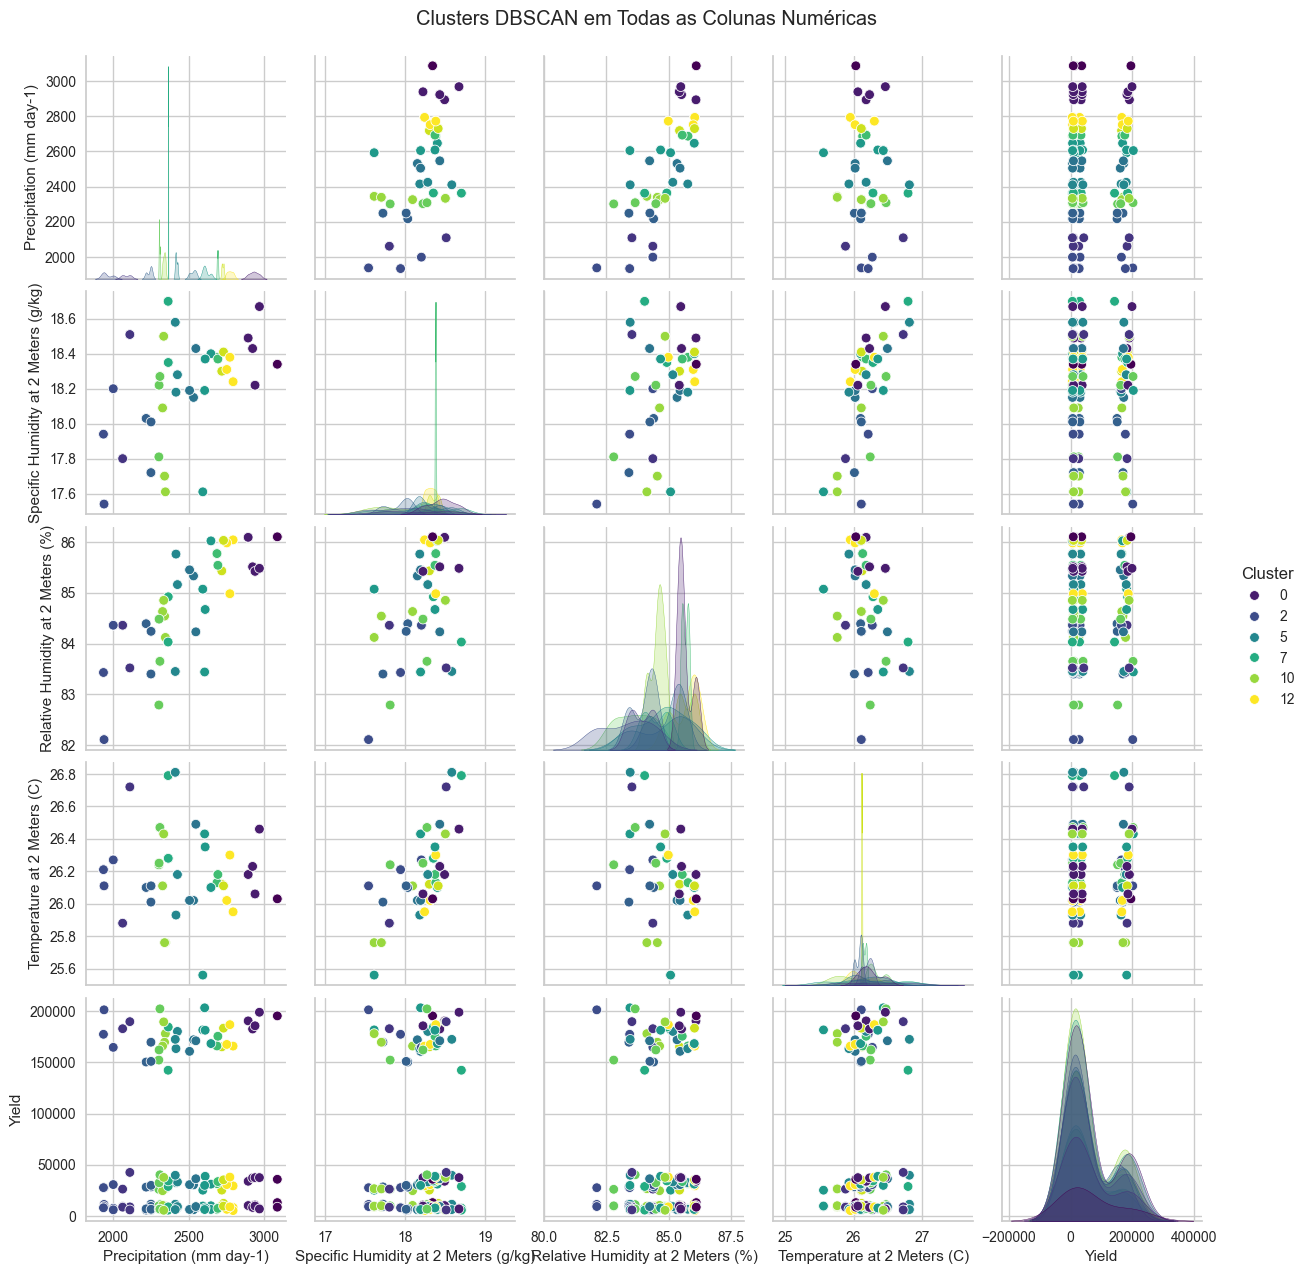

In [30]:
#Identificação de outliers com DBSCAN
X = df_classes.select_dtypes(include=np.number)  # Seleciona apenas colunas numéricas
dbscan = HDBSCAN(min_cluster_size=5, min_samples=3)

labels = dbscan.fit_predict(X)

# Adiciona os rótulos dos clusters ao DataFrame
df_clusters = df.copy()
df_clusters['Cluster'] = labels

# Faz o pairplot colorindo pelos clusters
sns.pairplot(df_clusters, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Clusters DBSCAN em Todas as Colunas Numéricas', y=1.02)
plt.show()

# 3. Modelagem Preditiva com Cinco Algoritmos Diferentes

Foram desenvolvidos cinco modelos preditivos distintos utilizando diferentes algoritmos de regressão, conforme solicitado. O PyCaret foi utilizado para automatizar o pré-processamento, seleção, treinamento e avaliação dos modelos. As métricas de desempenho (R², RMSE, MAE) foram calculadas para cada modelo, e gráficos de erro e importância de variáveis foram gerados para análise dos resultados.

---

In [31]:
# Divisão de treino e teste
train, test = train_test_split(df,
                               test_size=0.2,
                               random_state=42)
# IMPORTANTE: o pycaret sempre começa com o setup()
reg = setup(data=train,         # Dados para treino
            target="Yield",   # Label a ser predito
            train_size=0.7)     # Proporção de dados para treino (o resto é validação)

,Description,Value
0,Session id,1966
1,Target,Yield
2,Target type,Regression
3,Original data shape,"(124, 6)"
4,Transformed data shape,"(124, 9)"
5,Transformed train set shape,"(86, 9)"
6,Transformed test set shape,"(38, 9)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


# 4. Seleção dos 5 melhores modelos treinados utilizando o PyCaret pelo R2 score.
Abaixo faremos um comparativo e seleção dos 5 melhores modelos treinados utilizando o PyCaret


In [32]:
# Agora vamos comparar diversos modelos de regressão
compare_models(sort="R2")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,5742.2296,79564664.7975,8439.5703,0.9836,0.2657,0.2046,0.0070
llar,Lasso Least Angle Regression,5748.0999,79862862.1076,8454.5708,0.9836,0.2656,0.2044,0.0070
lr,Linear Regression,5787.3377,81037975.6217,8518.0818,0.9834,0.2690,0.2055,0.0060
lar,Least Angle Regression,5787.3377,81037975.6216,8518.0818,0.9834,0.2690,0.2055,0.0070
ridge,Ridge Regression,6395.1146,89865669.4161,8975.9230,0.9820,0.2883,0.2744,0.0060
et,Extra Trees Regressor,5458.4607,95180624.3273,8507.2854,0.9810,0.1784,0.1446,0.0180
ada,AdaBoost Regressor,5601.8280,102015570.1791,9150.2940,0.9794,0.1738,0.1451,0.0100
rf,Random Forest Regressor,5705.1717,104609522.4146,9253.0349,0.9791,0.1756,0.1460,0.0210
gbr,Gradient Boosting Regressor,5788.8672,110527017.4755,9181.9840,0.9783,0.2011,0.1558,0.0110
xgboost,Extreme Gradient Boosting,6298.8380,132003449.9608,10197.3567,0.9736,0.1848,0.1548,0.0190


Lasso(random_state=1966)

# 4. Análise dos melhores modelos treinados acima utilizando o PyCaret*

In [33]:
# Seleciona os 5 melhores modelos
top5_models = compare_models(n_select=5, sort='R2')

# Avalia cada modelo no conjunto de teste
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


top5_models_results = []

for i, model in enumerate(top5_models, 1):
    print(f"Modelo {i}: {model}")
    # Cria modelo treinado
    final_model = finalize_model(model)
    # Faz predições no conjunto de teste
    predictions = predict_model(final_model, data=test)
    y_true = test['Yield']
    y_pred = predictions['Yield']
    # Calcula métricas
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)

    top5_models_results.append(model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,5742.2296,79564664.7975,8439.5703,0.9836,0.2657,0.2046,0.0080
llar,Lasso Least Angle Regression,5748.0999,79862862.1076,8454.5708,0.9836,0.2656,0.2044,0.0070
lr,Linear Regression,5787.3377,81037975.6217,8518.0818,0.9834,0.2690,0.2055,0.0070
lar,Least Angle Regression,5787.3377,81037975.6216,8518.0818,0.9834,0.2690,0.2055,0.0060
ridge,Ridge Regression,6395.1146,89865669.4161,8975.9230,0.9820,0.2883,0.2744,0.0080
et,Extra Trees Regressor,5458.4607,95180624.3273,8507.2854,0.9810,0.1784,0.1446,0.0170
ada,AdaBoost Regressor,5601.8280,102015570.1791,9150.2940,0.9794,0.1738,0.1451,0.0100
rf,Random Forest Regressor,5705.1717,104609522.4146,9253.0349,0.9791,0.1756,0.1460,0.0190
gbr,Gradient Boosting Regressor,5788.8672,110527017.4755,9181.9840,0.9783,0.2011,0.1558,0.0100
xgboost,Extreme Gradient Boosting,6298.8380,132003449.9608,10197.3567,0.9736,0.1848,0.1548,0.0110


Modelo 1: Lasso(random_state=1966)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,3337.7065,20332023.3936,4509.1045,0.9948,0.2529,0.1647


Modelo 2: LassoLars(random_state=1966)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,3314.2863,20199145.6069,4494.3460,0.9948,0.2482,0.1621


Modelo 3: LinearRegression(n_jobs=-1)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3132.7354,19308326.4536,4394.1241,0.9950,0.2181,0.1417


Modelo 4: Lars(random_state=1966)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,3132.7354,19308326.4536,4394.1241,0.9950,0.2181,0.1417


Modelo 5: Ridge(random_state=1966)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,3418.1313,23815555.4533,4880.1184,0.9939,0.2419,0.1919


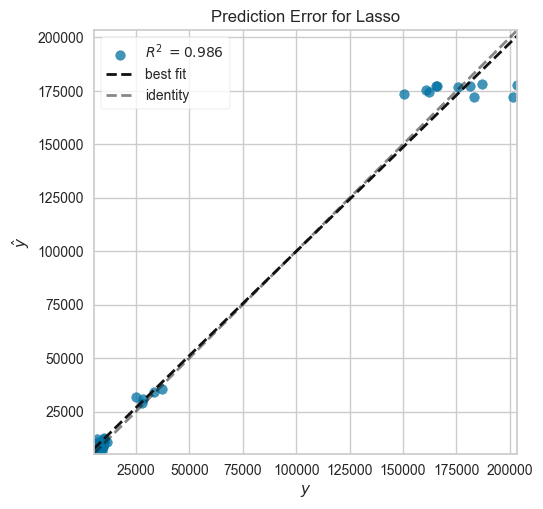

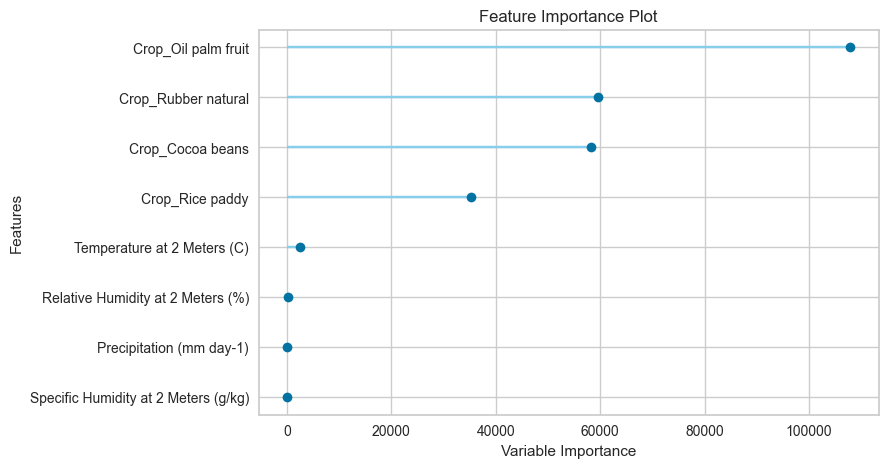

In [34]:

plot_model(top5_models_results[0], plot="error")
plot_model(top5_models_results[0], plot="feature")

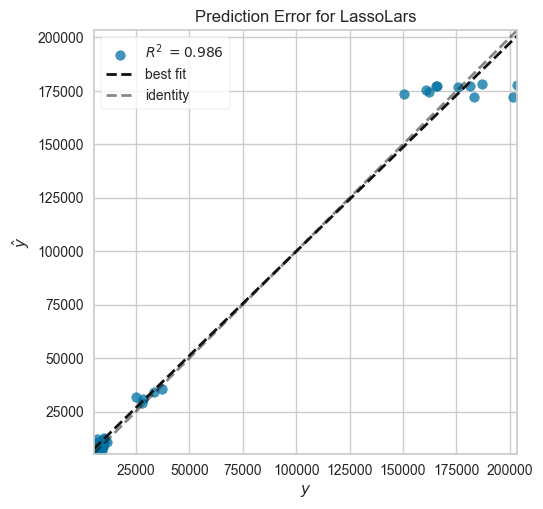

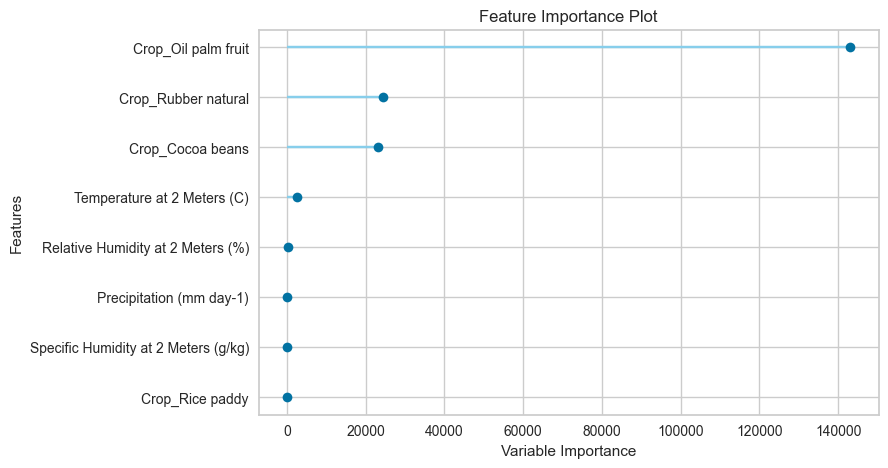

In [35]:
plot_model(top5_models_results[1], plot="error")
plot_model(top5_models_results[1], plot="feature")

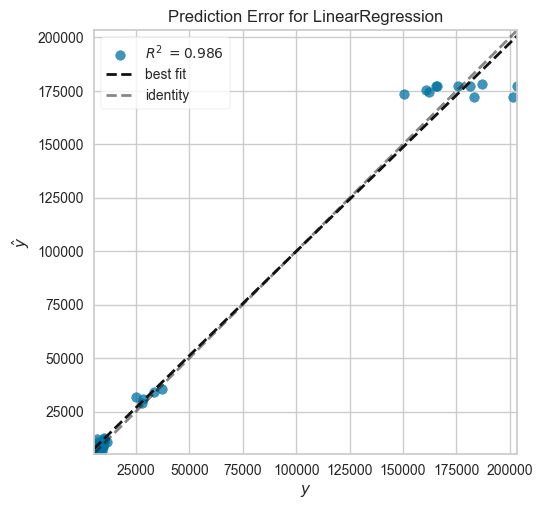

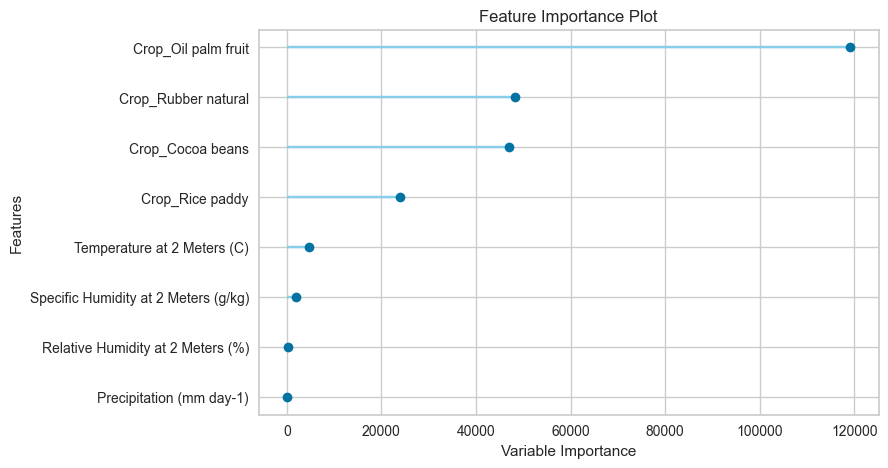

In [36]:
plot_model(top5_models_results[2], plot="error")
plot_model(top5_models_results[2], plot="feature")

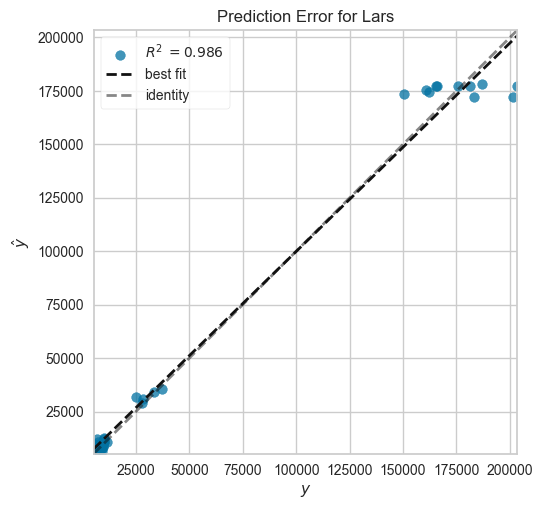

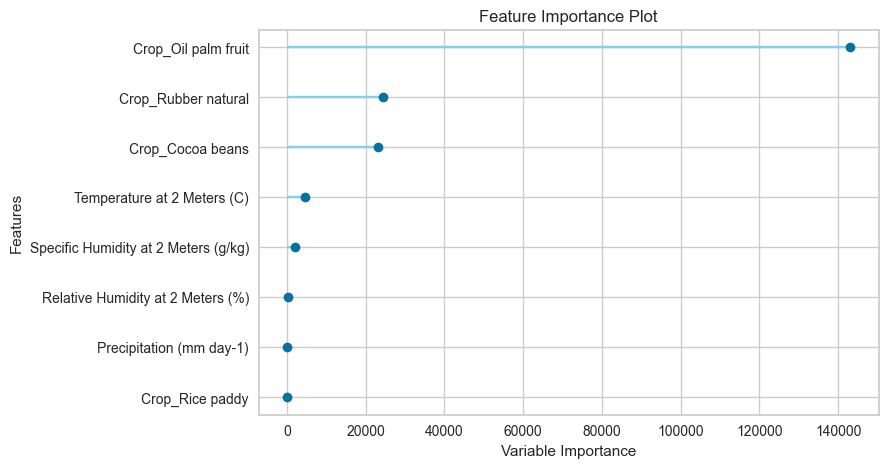

In [37]:
plot_model(top5_models_results[3], plot="error")
plot_model(top5_models_results[3], plot="feature")

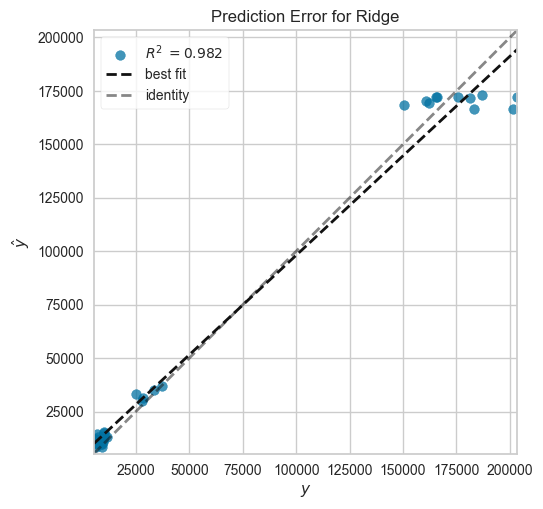

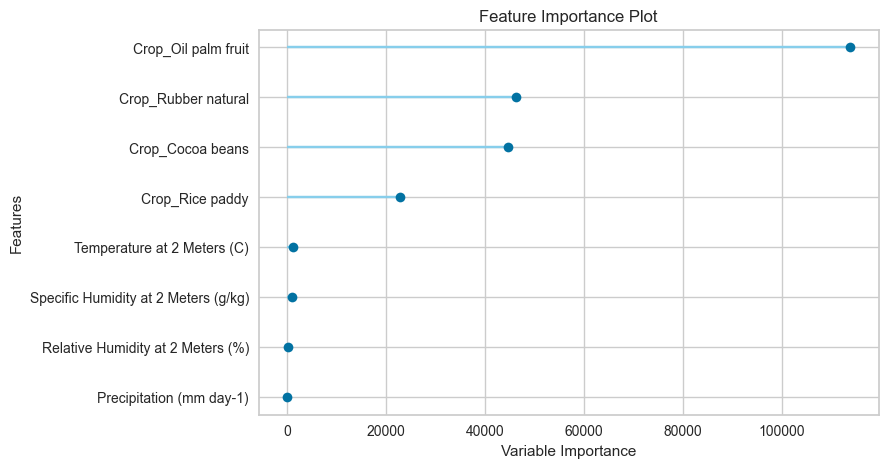

In [38]:
plot_model(top5_models_results[4], plot="error")
plot_model(top5_models_results[4], plot="feature")

# 5. Conclusão

Diante da proposta apresentada, conclui-se que a tarefa envolveu um fluxo completo de ciência de dados aplicado ao contexto agrícola. Inicialmente, a análise exploratória foi fundamental para compreender a base, suas variáveis e possíveis inconsistências. Em seguida, a utilização do algoritmo HDBSCAN para clusterização possibilitou identificar padrões nos rendimentos das plantações, além de destacar cenários discrepantes (outliers) de forma eficiente. Já na etapa de modelagem, o uso do PyCaret trouxe facilidades importantes, automatizando processos como o treinamento, comparação e avaliação de múltiplos algoritmos preditivos. Dessa forma, a construção de cinco modelos distintos seguiu boas práticas de Machine Learning e permitiu selecionar abordagens mais robustas para a previsão da produtividade das safras, garantindo resultados mais consistentes e alinhados às necessidades do problema.
